In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/param_files/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit

In [ ]:
list(model.initial_conditions)

In [ ]:
m1test = np.load('../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')

In [ ]:
m1 = np.load('../params_testing/necro_pars10k_mode1_5720_mod.npy')
m2 = np.load('../params_testing/necro_pars10k_mode2_5720_mod.npy')
m3 = np.load('../params_testing/necro_pars10k_mode3_5720_mod.npy')
m4 = np.load('../params_testing/necro_pars10k_mode4_5720_mod.npy')

In [ ]:
[i.name for i in model.parameters_rules()[:20]]

In [ ]:
InitialsSensitivity.create_boxplotp(x_axis_label=None, save_name='mode1_k12_parambox_20',
                                    out_dir='Mode1/mode1_params_k12_1/', 
                                   show=False, infile = 'Mode1/mode1_params_k12_1/mode1k12boxpnew.csv',
                                  names =  [i.name for i in model.parameters_rules()[:20]])

In [ ]:
InitialsSensitivity.create_boxplotp(x_axis_label=None, save_name='mode2_k7_parambox_20',
                                    out_dir='Mode2/mode2_params_k7_1/', 
                                   show=False, infile = 'Mode2/mode2_params_k7_1/mode2k7boxpnew.csv',
                                  names =  [i.name for i in model.parameters_rules()[:20]])

In [ ]:
InitialsSensitivity.create_boxplotp(x_axis_label=None, save_name='mode3_k17_parambox_20',
                                    out_dir='Mode3/mode3_params_k17_1/', 
                                   show=False, infile = 'Mode3/mode3_params_k17_1/mode3k17boxpnew.csv',
                                  names =  [i.name for i in model.parameters_rules()[:20]])

In [ ]:
InitialsSensitivity.create_boxplotp(x_axis_label=None, save_name='mode4_k15_parambox_20',
                                    out_dir='Mode4/mode4_params_k15_1/', 
                                   show=False, infile = 'Mode4/mode4_params_k15_1/mode4k15boxpnew.csv',
                                  names =  [i.name for i in model.parameters_rules()[:20]])

(14, 325)


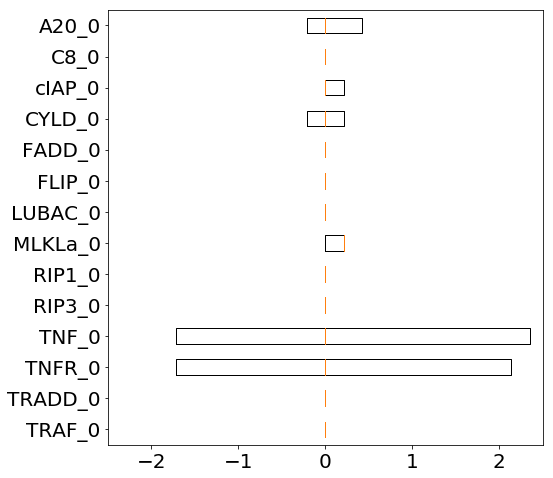

In [2]:
InitialsSensitivity.create_boxplot(x_axis_label=None, save_name='mode1_k12_boxplot_fliers',
                                    out_dir='Mode1/mode1_initials_k12', 
                                   show=False, infile = 'Mode1/mode1_initials_k12/mode1k12boxinew.csv',
                                  names = [i[1].name for i in model.initial_conditions])

(14, 325)


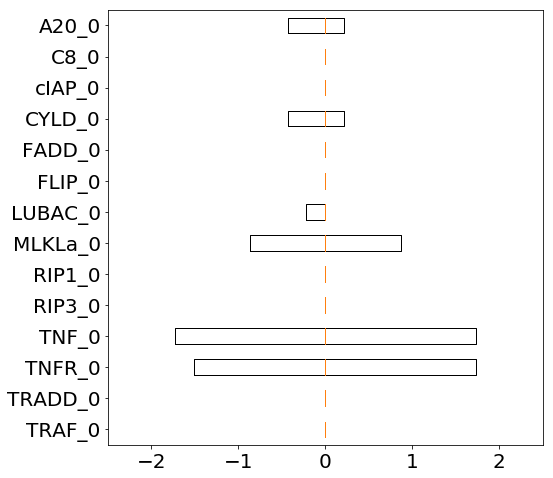

In [3]:
InitialsSensitivity.create_boxplot(x_axis_label=None, save_name='mode2_k7_boxplot',
                                    out_dir='Mode2/mode2_initials_k7', 
                                   show=False, infile = 'Mode2/mode2_initials_k7/mode2k7boxinew.csv',
                                  names = [i[1].name for i in model.initial_conditions])

(14, 325)


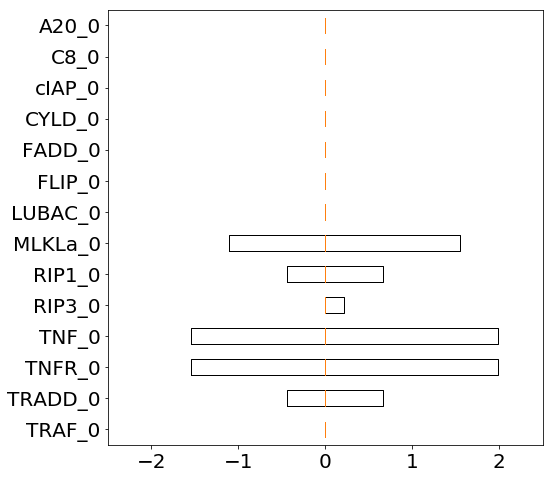

In [4]:
InitialsSensitivity.create_boxplot(x_axis_label=None, save_name='mode3_k17_boxplot',
                                    out_dir='Mode3/mode3_initials_k17', 
                                   show=False, infile = 'Mode3/mode3_initials_k17/mode3k17boxinew.csv',
                                  names = [i[1].name for i in model.initial_conditions])

(14, 325)


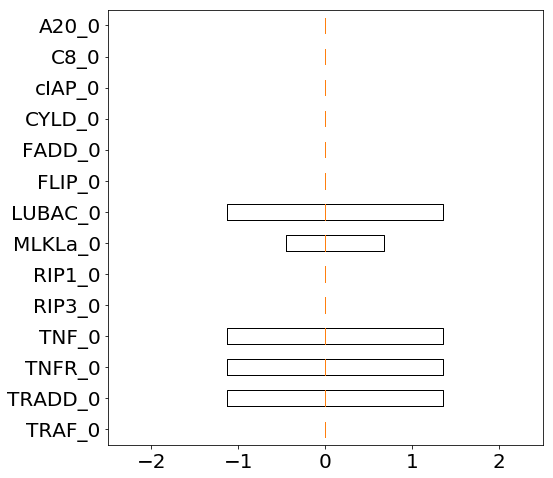

In [5]:
InitialsSensitivity.create_boxplot(x_axis_label=None, save_name='mode4_k15_boxplot',
                                    out_dir='Mode4/mode4_initials_k15/', 
                                   show=False, infile = 'Mode4/mode4_initials_k15/mode4k15boxinew.csv',
                                  names = [i[1].name for i in model.initial_conditions])

In [ ]:
print(m2[:,30])
print(m2[:,31])
print(m2[:,32])

In [ ]:
m2[:,30] = m22[:,31]
m2[:,31] = m22[:,32]
m2[:,32] = m22[:,30]

In [ ]:
m3[:,30] = m33[:,31]
m3[:,31] = m33[:,32]
m3[:,32] = m33[:,30]

In [ ]:
m4[:,30] = m44[:,31]
m4[:,31] = m44[:,32]
m4[:,32] = m44[:,30]

In [ ]:
print(m2[:,30])
print(m2[:,31])
print(m2[:,32])

In [ ]:
np.save('../params_testing/necro_pars10k_mode1_5720_modcylda20.npy', m1)

In [ ]:
np.save('../params_testing/necro_pars10k_mode2_5720_modcylda20.npy', m2)

In [ ]:
np.save('../params_testing/necro_pars10k_mode3_5720_modcylda20.npy', m3)

In [ ]:
np.save('../params_testing/necro_pars10k_mode4_5720_modcylda20.npy', m4)

In [ ]:
tspan = np.linspace(0,1800,500)
m = model.components
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1 = solverwtm1.run(initials = {m.A20(brip=None):0},
                      param_values=m1test, num_processors = 20)
m1alldf100wt = wtm1.dataframe

In [ ]:
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1 = solverwtm1.run(initials = {m.A20(brip=None):0},
                      param_values=m2, num_processors = 20)
m1alldf100wt2 = wtm1.dataframe

In [ ]:
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1 = solverwtm1.run(initials = {m.A20(brip=None):0},
                      param_values=m3, num_processors = 20)
m1alldf100wt3 = wtm1.dataframe

In [ ]:
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1 = solverwtm1.run(initials = {m.A20(brip=None):0},
                      param_values=m4, num_processors = 20)
m1alldf100wt4 = wtm1.dataframe

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(m1test)):
    plt.plot(tspan/60, m1alldf100wt.loc[n]['MLKLa_obs'].iloc[:],
             color = 'red', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("pMLKL", fontsize=20)
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.set_yticks([0, 0.5, 1.0])
# plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogridwdata.pdf')
plt.show() 

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(m2)):
    plt.plot(tspan/60, m1alldf100wt2.loc[n]['MLKLa_obs'].iloc[:],
             color = 'orange', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("pMLKL", fontsize=20)
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
plt.show() 

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(m3)):
    plt.plot(tspan/60, m1alldf100wt3.loc[n]['MLKLa_obs'].iloc[:],
             color = 'blue', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("pMLKL", fontsize=20)
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
plt.show() 

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(m4)):
    plt.plot(tspan/60, m1alldf100wt4.loc[n]['MLKLa_obs'].iloc[:],
             color = 'green', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("pMLKL", fontsize=20)
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
plt.show() 

In [ ]:
for i,p in enumerate(model.parameters):
    print(i,":",p)